In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
import io
from scipy import optimize

In [2]:
import warnings
warnings.filterwarnings('ignore')
#uploaded = files.upload()

In [3]:
df = pd.read_csv('Fish.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Species'] = label_encoder.fit_transform(df['Species'])
df['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(['Weight','Species'], axis=1, inplace=False)
y = df['Weight']

In [8]:
corr = df.corr()
corr

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


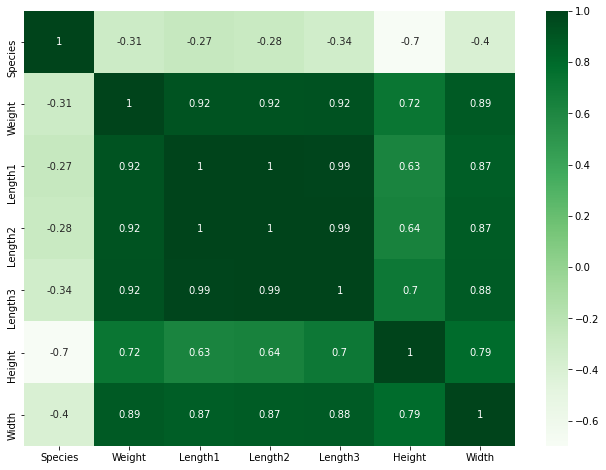

In [9]:
plt.figure(figsize=(11, 8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

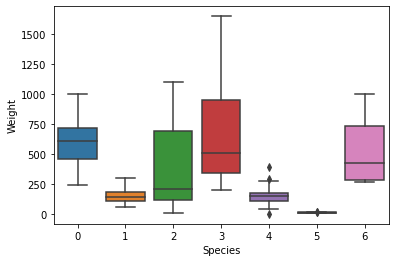

In [10]:
sns.boxplot(x='Species', y='Weight', data=df);

In [11]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 5), (32, 5), (127,), (32,))

In [14]:
y_test

78       78.0
155      13.4
128     200.0
55      270.0
94      150.0
29     1000.0
147       7.0
51      180.0
98      188.0
141    1250.0
19      650.0
60     1000.0
15      600.0
65      150.0
24      700.0
30      920.0
126    1000.0
101     218.0
96      225.0
16      700.0
151      10.0
18      610.0
12      500.0
9       500.0
31      955.0
125    1100.0
95      170.0
56      270.0
145       6.7
152       9.9
135     510.0
76       70.0
Name: Weight, dtype: float64

In [15]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [16]:
y_predz = lasso.predict(X_test)

In [17]:
y_predz

array([  73.8049459 , -157.80714343,  384.73046539,  298.48428124,
        177.77894859,  773.10811194, -212.3241639 ,  277.50611552,
        267.22635825, 1114.48097511,  612.66557089,  787.64013542,
        586.15196559,  171.72982967,  651.94704309,  783.13806179,
        925.07203548,  353.19325705,  253.99863704,  588.57109367,
       -172.94732741,  619.66320092,  517.26711993,  519.42102539,
        786.14342051,  908.87640369,  217.75827998,  303.94953834,
       -235.947815  , -176.2890377 ,  690.35800635,   21.04175492])

In [18]:
np.array(y_test)

array([  78. ,   13.4,  200. ,  270. ,  150. , 1000. ,    7. ,  180. ,
        188. , 1250. ,  650. , 1000. ,  600. ,  150. ,  700. ,  920. ,
       1000. ,  218. ,  225. ,  700. ,   10. ,  610. ,  500. ,  500. ,
        955. , 1100. ,  170. ,  270. ,    6.7,    9.9,  510. ,   70. ])

In [19]:
from sklearn.metrics import r2_score
print('R2 Score', r2_score(y_test, y_predz))

R2 Score 0.8823951529480503


In [20]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
lassoresults = sm.OLS(y_train,X).fit()

In [21]:
lassoresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     184.2
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           8.10e-55
Time:                        13:29:46   Log-Likelihood:                -787.66
No. Observations:                 127   AIC:                             1587.
Df Residuals:                     121   BIC:                             1604.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -515.3057     34.226    -15.056      0.000    -583.065    -447.546
Length1       43.5353     47.315      0.920      0.359     -50.137     137.208
Length2        7.8218     48.891      0.160      0.873     -88.970     104.614
Length3      -25.2567     18.146     -1.392      0.167     -61.181      10.667
Height        23.2289      9.384      2.475      0.015       4.652      41.806
Width         27.0665     21.800      1.242      0.217     -16.093      70.226
==============================================================================
Omnibus:                       20.933   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.028
Skew:                           0.844   Prob(JB):                     3.02e-07
Kurtosis:                       4.680   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
print('coefficients:', lasso.coef_)
print('Intercept:', lasso.intercept_)
print("mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_predz))
print('coefficient of determination (R^2): %.4f' %r2_score(y_test, y_predz))

coefficients: [ 48.94322988   0.69755317 -23.38662895  22.76028212  28.34359872]
Intercept: -514.6486139665255
mean squared error (MSE): 16728.03
coefficient of determination (R^2): 0.8824
